<a href="https://colab.research.google.com/github/rzqmhb/quiz-2-machine-learning-ti3f/blob/main/Quiz_2_TI3F_RoziqMahbubi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuis 2 Machine Learning

* Nama : Roziq Mahbubi
* Kelas : TI-3F/27
* NIM : 2141720086

# Import Library

In [14]:
import tensorflow as tf # import tensorflow
import numpy as np # import numpy
import pandas as pd # import pandas
import matplotlib.pyplot as plt # import pyplot
import seaborn as sns # import seaborn
from sklearn.preprocessing import LabelBinarizer # import LabelBinarizer untuk merubah label ke dalam bentuk biner
from sklearn.model_selection import train_test_split # import function u/ split data
from sklearn.metrics import classification_report # import function evaluasi
import zipfile # import library untuk manipulasi file zip

# Load Dataset

## Load MNIST

In [2]:
from tensorflow.keras.datasets import mnist # melakukan import data mnist yang berupa citra tulisan tangan

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data() # load data train dan data test mnist

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Check shape data
(train_data.shape, test_data.shape) # mencetak shape data train dan data test

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Check shape labels
(train_labels.shape, test_labels.shape) # mencetak shape label

((60000,), (10000,))

In [6]:
# Check each data shape --> should be 28*28
train_data[0].shape # mencetak shape salah satu citra

(28, 28)

In [7]:
# Check the label
train_labels.shape # mencetak shape label train

(60000,)

### Combine Train and Test Data

In [8]:
digits_data = np.vstack([train_data, test_data]) # menumpuk data train dan test disimpan dalam satu variable
digits_labels = np.hstack([train_labels, test_labels]) # menumpuk label train dan test disimpan dalam satu variable

In [9]:
# Check data shape
digits_data.shape # mencetak shape data

(70000, 28, 28)

In [10]:
# Check label shape
digits_labels.shape # mencetak shape label

(70000,)

Text(0.5, 1.0, 'Class: 5')

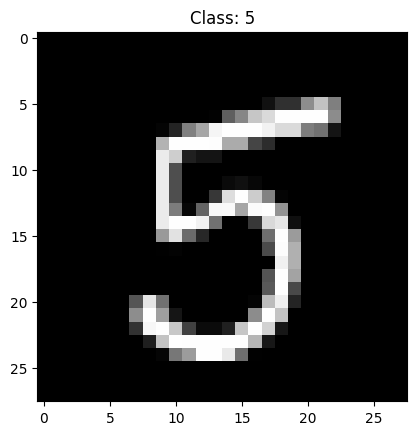

In [11]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0]) # random angka mulai dari 0 hingga jumlah data hasil tumpuk
plt.imshow(digits_data[idx], cmap='gray') # menampilkan citra pada indeks yang dihasilkan secara random
plt.title('Class: ' + str(digits_labels[idx])) # menampilkan label citra tersebut

<Axes: xlabel='Labels', ylabel='count'>

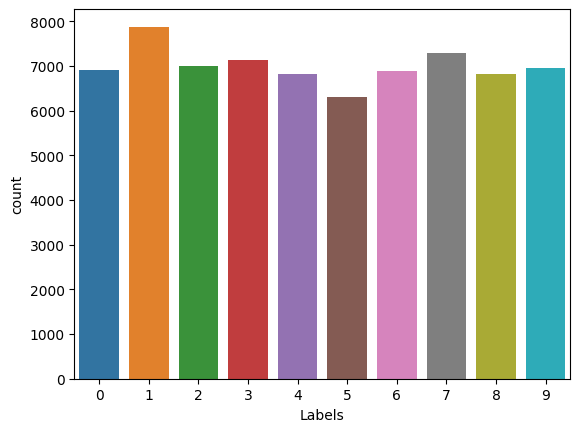

In [12]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels']) # menyimpan label hasil tumpuk menjadi dataframe pandas
sns.countplot(df_labels, x='Labels') # menampilkan plot jumlah label menggunakan seaborn

## Load Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip # mengambil dataset alfabet

--2023-12-04 11:28:23--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   144MB/s    in 1.3s    

2023-12-04 11:28:25 (144 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Extract zip file
# melakukan extract dataset yang berbentuk zip
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [15]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32') # membaca dataset yang berbentu .csv yang datanya dikonveriskan ke bentuk float
dataset_az # mencetak dataset

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1) # menyimpan data pixel ke variable lain
# Get labels only
alphabet_labels = dataset_az['0'] # menyimpan label ke variable lain

In [17]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape # mencetak shape data pixel dan label

((372450, 784), (372450,))

In [18]:
# Check shape labels
alphabet_labels.shape # mencetak shape label

(372450,)

In [19]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28)) # melakukan reshape pada data pixel, dari 372450x784 menjadi 372450x28x28
# Check the result by its shape
alphabet_data.shape # mencetak shape data pixel

(372450, 28, 28)

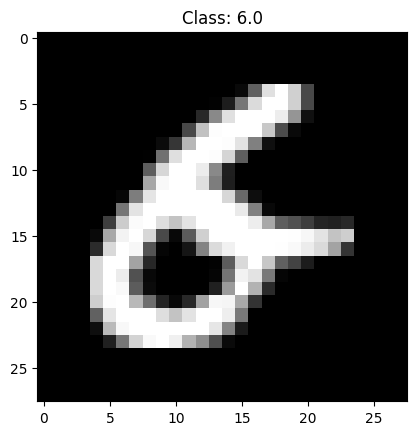

In [20]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0]) # random angka mulai dari 0 hingga jumlah data hasil tumpuk
plt.imshow(alphabet_data[index], cmap = 'gray') # menampilkan citra pada indeks yang dihasilkan secara random
plt.title('Class: ' + str(alphabet_labels[index])); # menampilkan label citra tersebut

<Axes: xlabel='Labels', ylabel='count'>

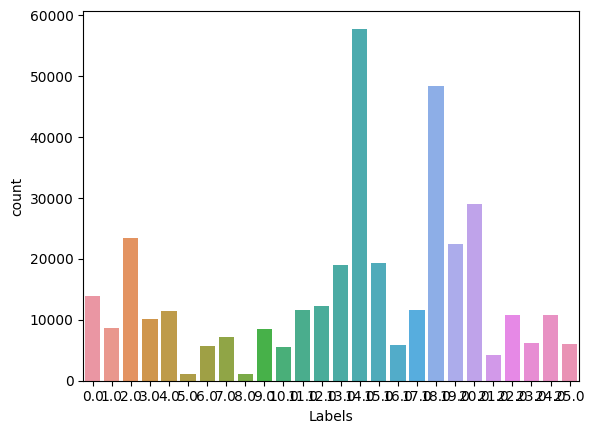

In [21]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values # menyimpan label menjadi dataframe pandas
})
sns.countplot(df_az_labels, x='Labels') # menampilkan plot jumlah label menggunakan seaborn

## Combine Dataset (MNIST + Kaggel A-Z)

In [22]:
# Check unique value from digits_labels
np.unique(digits_labels) # mencetak label-label mnist

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels) # mencetak label-label kaggle

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10 # menambahkan 10 ke tiap value label kaggle agar dapat digabung dengan label mnist

In [25]:
# check alphabet labels again
np.unique(alphabet_labels) # mengecek label kaggle

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data]) # menggabung data mnist dengan data kaggle
labels = np.hstack([alphabet_labels, digits_labels]) # menggabung label mnist dengan label kaggle

In [27]:
# Check the shape
data.shape, labels.shape # mencetak shape data dan label gabungan

((442450, 28, 28), (442450,))

In [28]:
# Check labels
np.unique(labels) # mencetak label unik hasil gabungan

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data to float32
data = np.array(data, dtype = 'float32') # merubah bentuk data ke bentuk float

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1) # menambahkan dimensi depth pada citra grayscale

# check shape
data.shape # mengecek shape baru citra

(442450, 28, 28, 1)

# Preprocessing

In [31]:
# Normalize data
data /= 255.0 # normalisasi data

In [32]:
# Check range value of data
data[0].min(), data[0].max() # mengecek range value pixel

(0.0, 1.0)

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer() # inisiasi label binarizer
labels = le.fit_transform(labels) # binerisasi label

In [34]:
# Check labels shape
labels.shape # # mencetak shape label

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

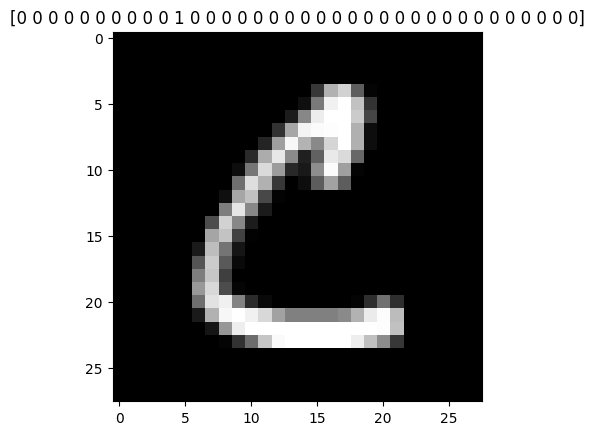

In [35]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray') # mereshape data agar dapat ditampilkan sebagai citra pada indeks 30000
plt.title(str(labels[0])) # menampilkan label citra tersebut

In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0) # menghitung jumlah tiap label
classes_total # menampilkan jumlah tiap label

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Check the biggest value of data
classes_total.max() # mencetak jumlah tertinggi dari label

57825

In [38]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i] # membuat bobot untuk tiap label dengan cara membagi jumlah label tertinggi dengan jumlah label saat ini

# Check the weight for each data
classes_weights # mengecek bobot label

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels) # membagi data dan label untuk train dan test

## Create Data Augmentation

In [40]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator # import class untuk augmentasi citra

In [41]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False) # inisiasi class augmentasi citra

# Build CNN Model

In [42]:
# Import library
from tensorflow.keras.models import Sequential # import model sequential milik keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense # import layer-layer keras
from tensorflow.keras.callbacks import ModelCheckpoint # import callback keras

In [43]:
# Build the network
network = Sequential() # inisiasi model

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) # menambahkan layer conv2d dengan filter 32 dan kernel 3x3
network.add(MaxPool2D(pool_size=(2,2))) # menambahkan layer pool dengan ukuran 2x2

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')) # menambahkan layer conv2d dengan filter 64 dan kernel 3x3
network.add(MaxPool2D(pool_size=(2,2)))# menambahkan layer pool dengan ukuran 2x2

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid')) # menambahkan layer conv2d dengan filter 128 dan kernel 3x3
network.add(MaxPool2D(pool_size=(2,2)))# menambahkan layer pool dengan ukuran 2x2

network.add(Flatten()) # menambahkan layer flatten

network.add(Dense(64, activation = 'relu')) # menambahkan layer dense
network.add(Dense(128, activation = 'relu')) # menambahkan layer dense lainnya

network.add(Dense(36, activation='softmax')) # menambahkan layer output dengan 36 class

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # melakukan compile pada model

In [44]:
# Check network summary
network.summary() # mencetak ringkasan model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [20]:
# Create actual labels
name_labels = '0123456789' # membuat label angka
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # menambahkan label huruf
name_labels = [l for l in name_labels] # merubah label menjadi list

# Check actual label
print(name_labels) # mencetak label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [46]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model' # mendefinisikan file tempat penyimpanan model
epochs = 20 # menentukan epoch
batch_size = 128 # menentukan batch size

In [47]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True) # inisiasi callback

In [48]:
# Fit the model
# melakukan pelatihan pada model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.1036 - accuracy: 0.8293
Epoch 1: val_loss improved from inf to 0.38364, saving model to custom_ocr.model
2765/2765 [==============================] - 164s 55ms/step - loss: 2.1033 - accuracy: 0.8293 - val_loss: 0.3836 - val_accuracy: 0.8366
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9603 - accuracy: 0.9009
Epoch 2: val_loss improved from 0.38364 to 0.21822, saving model to custom_ocr.model
2765/2765 [==============================] - 138s 50ms/step - loss: 0.9603 - accuracy: 0.9009 - val_loss: 0.2182 - val_accuracy: 0.9070
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8108 - accuracy: 0.9125
Epoch 3: val_loss improved from 0.21822 to 0.20909, saving model to custom_ocr.model
2765/2765 [==============================] - 144s 52ms/step - loss: 0.8107 - accuracy: 0.9125 - val_loss: 0.2091 - val_accuracy: 0.9057
Epoch 4/20
2764/2765 [=========================

# Evaluate Model

## Make a Single Prediction

In [49]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size) # membuat prediksi menggunakan model

692/692 [==============================] - 2s 2ms/step


In [50]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1] # menampilkan hasil prediksi dari citra indeks 1

array([2.04813725e-18, 8.69812500e-10, 4.25203969e-12, 1.10951274e-13,
       2.59479477e-13, 4.09067142e-14, 1.99402178e-14, 4.23227832e-13,
       4.99836006e-15, 3.25471923e-21, 3.41264181e-13, 4.43905676e-12,
       7.35588535e-11, 3.11607913e-08, 1.44003234e-12, 6.12206319e-15,
       1.71135583e-09, 1.70378658e-13, 9.99944687e-01, 5.48564385e-05,
       4.54547187e-15, 3.72097048e-10, 2.78525278e-17, 3.17562414e-15,
       1.02997003e-11, 1.44574023e-12, 2.80420109e-22, 9.95274218e-18,
       6.51125985e-12, 4.33607994e-07, 6.21028506e-10, 1.64797914e-19,
       2.19641109e-16, 4.63027880e-12, 8.62159719e-11, 2.57601079e-10],
      dtype=float32)

In [51]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1]) # menampilkan indeks label yang diprediksi pada citra indeks 1

18

In [52]:
# Check label for 24
name_labels[18] # menampilkan label hasil prediksi

'I'

In [53]:
# Check y_test label for 0
y_test[1] # label aktual dari citra yang diprediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# check the highest value
np.argmax(y_test[1]) # menampilkan indeks label aktual

18

In [55]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])] # menampilkan label dari citra pada indeks 18

'S'

## Make an Evaluation on Test Data

In [56]:
# Evaluate on test data
network.evaluate(X_test, y_test) # melakukan evaluasi pada model

2766/2766 [==============================] - 9s 3ms/step - loss: 0.2084 - accuracy: 0.9208


[0.2083798050880432, 0.9208385348320007]

In [57]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels)) # menampilkan hasil evaluasi

              precision    recall  f1-score   support

           0       0.26      0.79      0.39      1381
           1       0.95      0.99      0.97      1575
           2       0.87      0.98      0.92      1398
           3       0.97      0.99      0.98      1428
           4       0.79      0.99      0.88      1365
           5       0.45      0.96      0.62      1263
           6       0.95      0.97      0.96      1375
           7       0.96      0.99      0.97      1459
           8       0.90      0.99      0.94      1365
           9       0.94      0.98      0.96      1392
           A       1.00      0.97      0.98      2774
           B       0.97      0.98      0.97      1734
           C       0.99      0.98      0.98      4682
           D       0.96      0.94      0.95      2027
           E       0.99      0.99      0.99      2288
           F       0.97      0.99      0.98       233
           G       0.95      0.95      0.95      1152
           H       0.98    

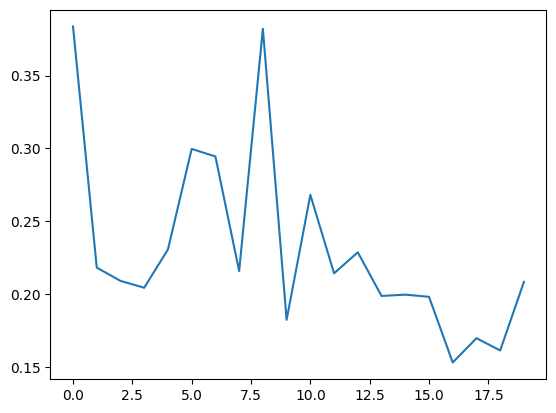

In [58]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss']) # manamppilkan plot dari history loss value

In [59]:
# You can also check the another metrics
history.history.keys() # menampilkan keys atau nama tiap kolom pada history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

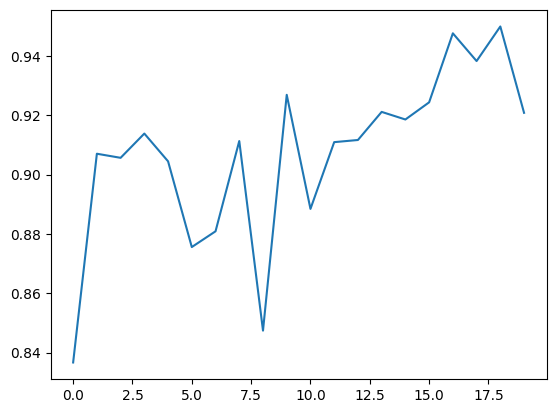

In [60]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy']) # manamppilkan plot dari history accuracy value

# Save The Model

In [61]:
# The result will show in colab directory
network.save('network', save_format= 'h5') # menyimpan model yang telah dilatih

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Import library
from tensorflow.keras.models import load_model # import library untuk load model keras

In [4]:
# Load saved network
load_network = load_model('/content/drive/MyDrive/Kuliah_SMT_5/ML/network') # load model yang telah disimpan

In [5]:
# Check summary
load_network.summary() # menampilkan ringkasan model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

## Image 1


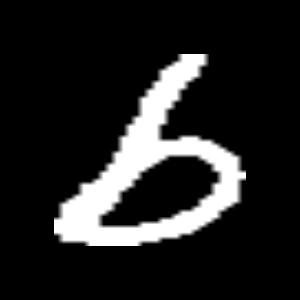

In [44]:
# Load Image
# memuat citra yang akan diprediksi
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Kuliah_SMT_5/ML/b_small.png')
cv2_imshow(img)

In [45]:
# Check shape
img.shape # mencetak shape citra

(300, 300, 3)

In [46]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # merubah menjadi grayscale

# check shape
gray_img.shape # mencetak shape citra grayscale

(300, 300)

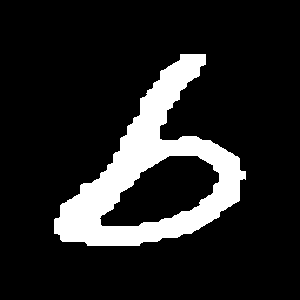

120.0


In [47]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # binerisasi citra

cv2_imshow(thresh) # menampilkan citra biner

# print threshold value
print(value)  # mencetak niali threshold

In [48]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28)) # me-resize citra menjadi 28x28 pixel
cv2_imshow(img_resize) # menampilkan citra hasil resize

In [49]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization # merubah citra menjadi float dan melakukan normalisasi
img_input = np.expand_dims(img_input, axis=-1) # insert depth # menambahkan depth pada citra

# check shape
img_input.shape # mencetak shape citra

(28, 28, 1)

In [50]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1)) # menambahkan dimensi jumlah citra(satu karena hanya ada satu citra)
img_input.shape

(1, 28, 28, 1)

In [51]:
# Make a predition
prediction = load_network.predict(img_input) # melakukan prediksi pada citra
pred_label = np.argmax(prediction) # predict actual label
pred_label # label hasil prediksi

1/1 [==============================] - 0s 41ms/step


6

In [52]:
# check label for 6
name_labels[pred_label] # menampilkan label hasil prediksi

'6'

## Analisis Singkat

Kode di atas merupakan implementasi model CNN milik keras. Model tersebut dilatih dengan dataset mnist dan kaggle A-Z, yaitu dataset citra tulisan tangan angka dan tulisan tangan alfabet. Bisa dilihat dari hasil evaluasi model, bahwa model memiliki tingkat akurasi yang cukup tinggi. Hanya saja, pada saat model digunakan untuk melakukan prediksi pada citra yang agak ambigu seperti citra 'b_small.png' di atas, model kesulitan dalam membedakan antara huruf b kecil dengan angka 6. Sehingga, model memerlukan data-data baru yang akan mencegah kekeliruan prediksi label oleh model di masa mendatang.

## Image 2

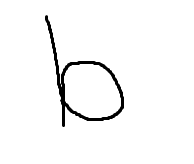

In [53]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Kuliah_SMT_5/ML/b_small2.png')
cv2_imshow(img)

In [54]:
# Check shape
img.shape

(164, 194, 3)

In [55]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(164, 194)

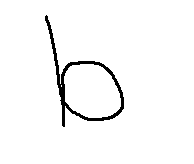

127.0


In [56]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [57]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [58]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [59]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [60]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 41ms/step


11

In [61]:
# check label for 6
name_labels[pred_label]

'B'